# Data Preprocessing and EDA 1

# FER 2013 Dataset

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import sys 
from PIL import Image
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Source: https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
tf.keras.utils.set_random_seed(42)

In [2]:
# Importing global variables
sys.path.append('./Main/Helper/')
import helper as hp

Metal device set to: Apple M2 Max


# Finding image width and height

The dimensions of the images in the FER 2013 data set are: 48x48 and are in grayscale.

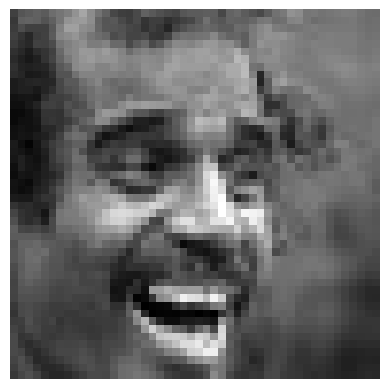

(48, 48, 1)


In [3]:
#Load sample image from AffectNet
image = Image.open('./Data/FER2013/train/happy/Training_10046809.jpg')

# Display image
plt.imshow(image, cmap = 'gray')
plt.axis('off') # Turn axes off
plt.show();

#Get the shape of sample image
image_shape = img_to_array(image).shape
#Print shape of sample image
print(image_shape)

# Loading in data

There are **28709 total images** that belong to 7 classes in **FER 2013 Train set** 

There are **7178 total images** that belong to 7 classes in **FER 2013 Test set** 

In [4]:
# Code modified from Lesson 8.06 -CNN 
# Source: https://www.tensorflow.org/tutorials/load_data/images

base_path = './Data/FER2013'
w= 48
h= 48

train = image_dataset_from_directory(
    base_path + '/train',
    image_size=(w,h),
    batch_size=32,
    seed=42,
    color_mode= 'grayscale',
    label_mode='categorical'
)

test = image_dataset_from_directory(
    base_path + '/test',
    image_size=(w,h),
    batch_size=32,
    color_mode= 'grayscale',
    label_mode='categorical',
    shuffle=False
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


# Class Distribution

The class distribution of the train and test set is **imbalanced**

### Train dataset class distribution

In [5]:
hp.print_class_counts(train)

2023-06-01 22:45:52.917322: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Index 0: angry - Count: 3995, Percentage: 13.92%
Index 1: disgust - Count: 436, Percentage: 1.52%
Index 2: fear - Count: 4097, Percentage: 14.27%
Index 3: happy - Count: 7215, Percentage: 25.13%
Index 4: neutral - Count: 4965, Percentage: 17.29%
Index 5: sad - Count: 4830, Percentage: 16.82%
Index 6: surprise - Count: 3171, Percentage: 11.05%


### Test dataset class distribution

In [6]:
hp.print_class_counts(test)

Index 0: angry - Count: 958, Percentage: 13.35%
Index 1: disgust - Count: 111, Percentage: 1.55%
Index 2: fear - Count: 1024, Percentage: 14.27%
Index 3: happy - Count: 1774, Percentage: 24.71%
Index 4: neutral - Count: 1233, Percentage: 17.18%
Index 5: sad - Count: 1247, Percentage: 17.37%
Index 6: surprise - Count: 831, Percentage: 11.58%


## Visualize Class Imbalance in Train set

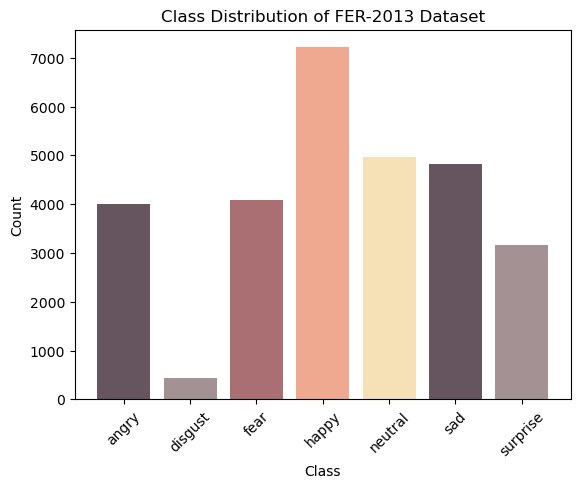

In [7]:
title = 'Class Distribution of FER-2013 Dataset'

hp.plot_class_distribution(train, title)

There is a large class imbalance in both the training set in the FER2013 dataset. Majority images being `happy`, `neutral`, and `sad`. 

`Disgust` has the lowest amount of images, accounting for only 1.5% of the total dataset. 

# Class imbalance solution

To counteract the vast class imbalance in the FER 2013 dataset, more images were pulled from the `AffectNet` dataset. These images were preprocessed to match the images in the FER 2013 dataset. The preprocessing of AffectNet dataset can be found [in this notebook](AffectNet.ipynb). The goal is to have each class have around 7215 images (the amount of images in the majority class: happy).